**PyTorch workflow Fundamentals**

In [71]:
import torch
import matplotlib.pyplot as plt
from torch import nn

In [72]:
# Data preparing and loading
weight=0.7
bias=0.3

# unsqueeze ndim=1, makes it 2 dimention
X=torch.arange(0,1,0.02).unsqueeze(dim=1)
y=weight*X+bias

X[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [73]:
# Training, Testing, Validation data
# Train : 60-80% always
# Test : 40-20% always
# Validation : 10-20% often but not always

train_test_split=int(0.8*len(X))
X_train, X_test=X[:train_test_split],X[train_test_split:]
y_train, y_test=y[:train_test_split],y[train_test_split:]

print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

# here X: Feature, y: Label

40
10
40
10


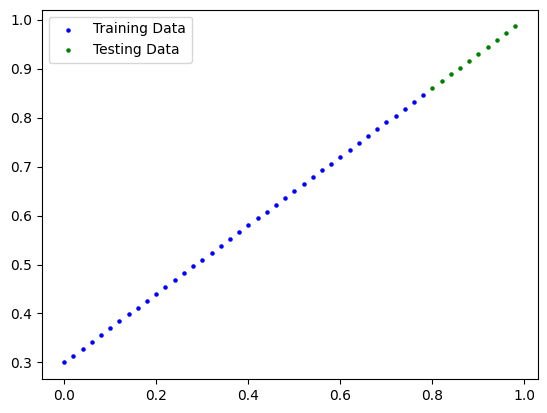

In [74]:
# plotting train, test data

def plot_predictions(train_data=X_train,
                    train_label=y_train, 
                    test_data=X_test, 
                    test_label=y_test,
                    predictions=None):
    # plt.figure(figsize=(10,7))
    plt.scatter(train_data, train_label, color='blue', label='Training Data',s=5)
    plt.scatter(test_data, test_label, color='green', label='Testing Data',s=5)
    if predictions is not None:
        plt.scatter(test_data, predictions, color='red',s=5,label='Predictions')
    plt.legend()
    plt.show()

plot_predictions()

In [75]:
# Building a LinearRegressionModel in PyTorch
class LinearRegressionModel(nn.Module): # nn.Module : the basic building block for building anything in PyTorch
    def __init__(self):
        super().__init__()
        self.weights=nn.Parameter(torch.rand(1, dtype=torch.float32, requires_grad=True)) # nn.Parameter : contains smaller parameters like weight, biases that make large module like `nn.Module`
        self.bias=nn.Parameter(torch.rand(1, dtype=torch.float32, requires_grad=True))

    
    def forward(self, x:torch.tensor)->torch.Tensor: # forward : tells larger block how to define operations on input (x)
        return self.weights*x+self.bias
    

In [76]:
# checking the content of the pytorch model

torch.manual_seed(42) # for reproducibility
model_0=LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.8823], requires_grad=True),
 Parameter containing:
 tensor([0.9150], requires_grad=True)]

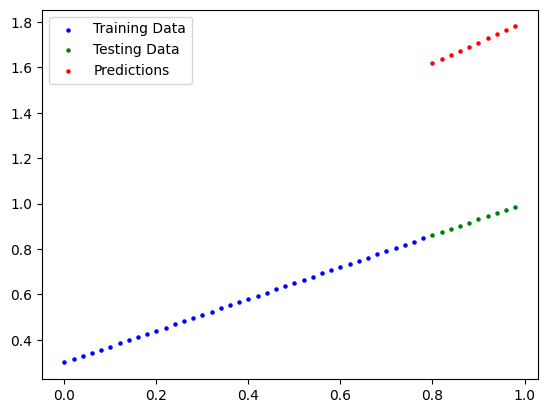

In [77]:
# before training
# making prediction using `torch.inference_mode()`
with torch.inference_mode():
    y_preds=model_0(X_test)

# plotting our predictions
plot_predictions(predictions=y_preds)

without training the model, testing look really bad

let's train model first

in PyTorch, we have `Loss Function`, `Optimizer` to train better model
`Loss Function`: tells the actual difference between predicted and actual value

eg: MAE for regression problems `torch.nn.L1Loss()`
Binary cross Entropy for classification problem, `torch.nn.BCELoss()

`Optimizer`: tells how to improve model to reduce `loss function`
eg: Stochistic Gradient Descent `torch.optim.SGD()`
Adam optimizer : `torch.optim.Adam()`

In [78]:
# creating a loss function
loss_fn=torch.nn.L1Loss()

# optimizer
optimizer=torch.optim.SGD(params=model_0.parameters(),lr=0.01)

PyTorch Training Testing Loop

PyTorch Training Loop
1. **Forward pass** : `model(x_train)`, model goes through all the training data first, performing it's `forward()` function calculation,
`y_pred=model(x_train)`
2. **calculate the loss** : model's output prediction compaired to ground truth(y_train) to see how wrong they are , 
`loss=loss_fn(y_pred, y_train)`
3. **zero gradient** : optimizer's gradient set to be zero, so they can be recalculated for specific training step. 
`optimizer.zero_grad()`
4. **backpropagation** : `loss.backward()` , teaching a neural network where it went wrong and nudgin it to do better next time.
5. **update optimizer** : `optimizer.step()`, update the optimizer for each step

PyTorch Testing Loop
1. **forward pass**
2. **calculate the loss**
3. **model evaluation** : `model.eval()`

In [ ]:
# training testing model
torch.manual_seed(42) # Reproducibility
epochs=100

epoch_count=[]
train_loss_values=[]
test_loss_values=[]

for epoch in range(epochs):

    # Training Model
    model_0(X_train) # putting the model in training mode

    y_pred=model_0(X_train) # forward pass
    loss=loss_fn(y_pred,y_train) # calculate the loss
    optimizer.zero_grad() # zero gradient
    loss.backward() # backpropagation
    optimizer.step() # update optimizer

    # Testing Model
    model_0.eval()
    with torch.inference_mode():
        test_pred=model_0(X_test) # forward pass
        test_loss=loss_fn(test_pred,y_test.type(torch.float)) #loss

        if epoch%10==0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(
                f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")





Epoch: 0 | MAE Train Loss: 0.6860889196395874 | MAE Test Loss: 0.7637526988983154 
Epoch: 10 | MAE Train Loss: 0.5708791017532349 | MAE Test Loss: 0.6290428042411804 
Epoch: 20 | MAE Train Loss: 0.45566922426223755 | MAE Test Loss: 0.4943329691886902 
Epoch: 30 | MAE Train Loss: 0.34045934677124023 | MAE Test Loss: 0.35962313413619995 
Epoch: 40 | MAE Train Loss: 0.2252494841814041 | MAE Test Loss: 0.2249133139848709 
Epoch: 50 | MAE Train Loss: 0.1100396141409874 | MAE Test Loss: 0.09020347893238068 
Epoch: 60 | MAE Train Loss: 0.009724985808134079 | MAE Test Loss: 0.020998019725084305 
Epoch: 70 | MAE Train Loss: 0.006216754671186209 | MAE Test Loss: 0.014099234715104103 
Epoch: 80 | MAE Train Loss: 0.002788322512060404 | MAE Test Loss: 0.005826681852340698 
Epoch: 90 | MAE Train Loss: 0.007095950655639172 | MAE Test Loss: 0.00754010071977973 


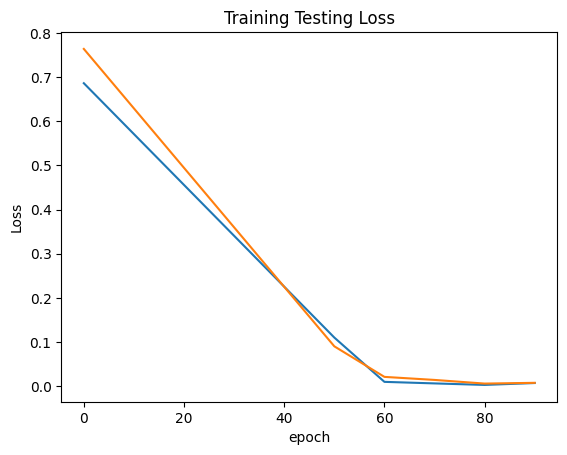

In [80]:
# plotting the loss
plt.plot(epoch_count, train_loss_values,label='Train Loss')
plt.plot(epoch_count, test_loss_values, label='Test Loss')
plt.title('Training Testing Loss')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.show()

In [ ]:
# finding out model's learned parameters
print(model_0.state_dict())
print(weight, bias)
# prediction so much close

OrderedDict({'weights': tensor([0.6977]), 'bias': tensor([0.3080])})
0.7 0.3


In [84]:
# so, PyTorch model get trained
# now, making predictions with trained PyTorch model

model_0.eval() # setting model into evaluation model
with torch.inference_mode():
    y_preds=model_0(X_test)
print(y_preds)

tensor([[0.8661],
        [0.8801],
        [0.8940],
        [0.9080],
        [0.9220],
        [0.9359],
        [0.9499],
        [0.9638],
        [0.9778],
        [0.9917]])


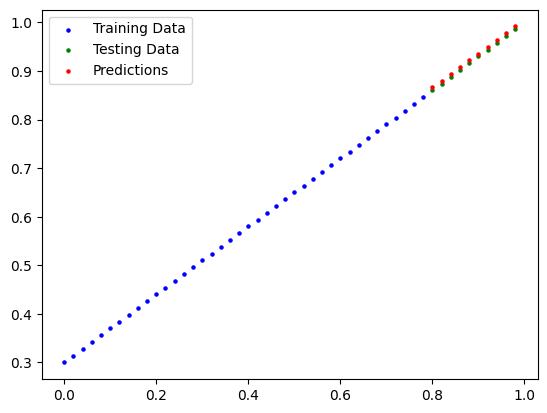

In [85]:
# plotting y_preds
plot_predictions(predictions=y_preds)

Saving and Loading PyTorch Model
1. `torch.save()`: saves the model
2. `torch.load()` : load's the save model
3. `torch.nn.Module.load_state_dict` : load model's parameter dict

In [87]:
from pathlib import Path
MODEL_PATH='../Models/'
MODEL_FILENAME='PyTorch_workflow_model.pth'
MODEL_SAVE_PATH=MODEL_PATH+MODEL_FILENAME

# saving the model
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),f=MODEL_SAVE_PATH)

Saving model to: ../Models/PyTorch_workflow_model.pth


In [88]:
# using the loaded models
loaded_model_0=LinearRegressionModel()
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [90]:
# loaded model evaluation
loaded_model_0.eval()
with torch.inference_mode():
    loaded_model_preds=loaded_model_0(X_test)

y_preds==loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])